In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer,make_column_selector
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from itertools import product
import time as time 
import joblib,pickle

train = pd.read_csv(('input_training.csv'))
y_tr = pd.read_csv('output_train.csv')

In [4]:
y1 = pd.read_csv('Sub25_01_HBG.csv')

In [6]:
y1 = pd.read_csv('Sub25_01_HBG_2.csv')

In [11]:
y_test = pd.read_csv('output_test_random.csv')

In [12]:
y1.shape == y_test.shape

True

# First look at the data

## The training set 

In [2]:
train.columns

Index(['ID', 'day', 'equity', 'r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7',
       'r8', 'r9', 'r10', 'r11', 'r12', 'r13', 'r14', 'r15', 'r16', 'r17',
       'r18', 'r19', 'r20', 'r21', 'r22', 'r23', 'r24', 'r25', 'r26', 'r27',
       'r28', 'r29', 'r30', 'r31', 'r32', 'r33', 'r34', 'r35', 'r36', 'r37',
       'r38', 'r39', 'r40', 'r41', 'r42', 'r43', 'r44', 'r45', 'r46', 'r47',
       'r48', 'r49', 'r50', 'r51', 'r52'],
      dtype='object')

In [4]:
train.head()

,ID,day,equity,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,r17,r18,r19,r20,r21,r22,r23,r24,r25,r26,r27,r28,r29,r30,r31,r32,r33,r34,r35,r36,r37,r38,r39,r40,r41,r42,r43,r44,r45,r46,r47,r48,r49,r50,r51,r52
0,0,249,1488,0.00,NaN,NaN,NaN,0.00,NaN,NaN,-68.03,-34.25,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN,0.00,137.93,0.00,NaN,NaN,-102.39,NaN,NaN,NaN,0.00,NaN,-34.36,NaN,0.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,NaN,NaN,0.00
1,1,272,107,-9.76,0.00,-12.21,46.44,34.08,0.00,41.24,12.08,-26.54,19.32,48.22,23.99,-7.18,-26.34,-2.40,0.00,-12.01,0.00,0.00,19.24,12.00,0.00,-16.78,0.00,-38.42,-19.29,0.00,14.49,14.46,-21.68,-45.87,-9.70,9.71,14.55,2.42,2.42,0.00,4.85,9.70,14.52,0.00,16.95,2.42,-4.83,-16.92,-4.84,4.84,0.00,7.26,-9.68,-19.38,9.71,26.68
2,2,323,1063,49.85,0.00,0.00,-26.64,-23.66,-22.14,49.12,53.61,-4.70,-28.27,0.00,-33.01,6.30,-31.45,-3.15,-26.78,33.18,-9.45,40.98,-4.71,-17.26,25.14,4.71,-17.27,15.73,-18.85,-3.93,3.15,18.12,5.50,9.43,4.71,0.00,-1.57,0.78,10.99,-4.70,-20.41,-36.21,-38.73,-4.76,16.67,-68.08,-6.37,1.59,6.37,-49.32,-9.59,-6.40,22.41,-6.39,7.99,15.96
3,3,302,513,0.00,NaN,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,11.59,NaN,NaN,NaN,0.00,NaN,0.00,0.00,NaN,0.00,NaN,NaN,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
4,4,123,1465,-123.84,-115.18,-26.44,0.00,42.42,10.56,0.00,-47.57,21.28,-10.63,-31.91,21.32,-53.19,-32.05,21.46,-32.12,-53.65,10.79,43.10,0.00,-32.22,-10.76,48.47,21.44,-42.83,42.96,10.71,-10.70,16.06,10.70,-10.68,0.00,-26.74,-37.53,32.29,-10.73,-26.88,26.94,-21.48,64.52,26.70,-42.55,-21.39,-5.36,-21.44,-21.48,10.78,-21.55,-5.40,-10.81,5.41,-32.47,43.43


In [5]:
train.shape

(843299, 56)

In [6]:
y_tr

,ID,reod
0,0,0
1,1,0
2,2,-1
3,3,0
4,4,-1
...,...,...
843294,843294,1
843295,843295,-1
843296,843296,0
843297,843297,1


In [7]:
y_tr.isna().sum()

ID      0
reod    0
dtype: int64

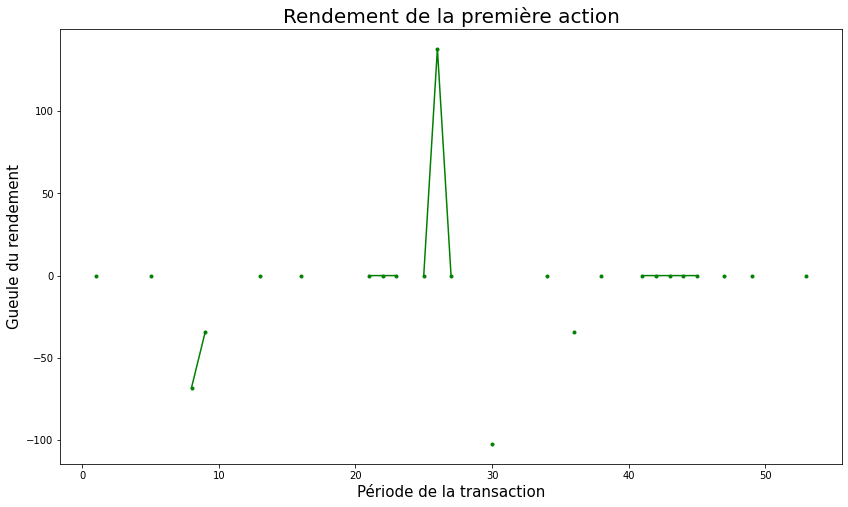

In [14]:
plt.figure(figsize=(14,8))
plt.plot(np.arange(1,54), train.iloc[0,3:],c = 'g',marker = '.')
plt.xlabel("Période de la transaction",fontsize = 15)
plt.ylabel("Gueule du rendement",fontsize=15)
plt.title('Rendement de la première action',fontsize=20)
plt.show()

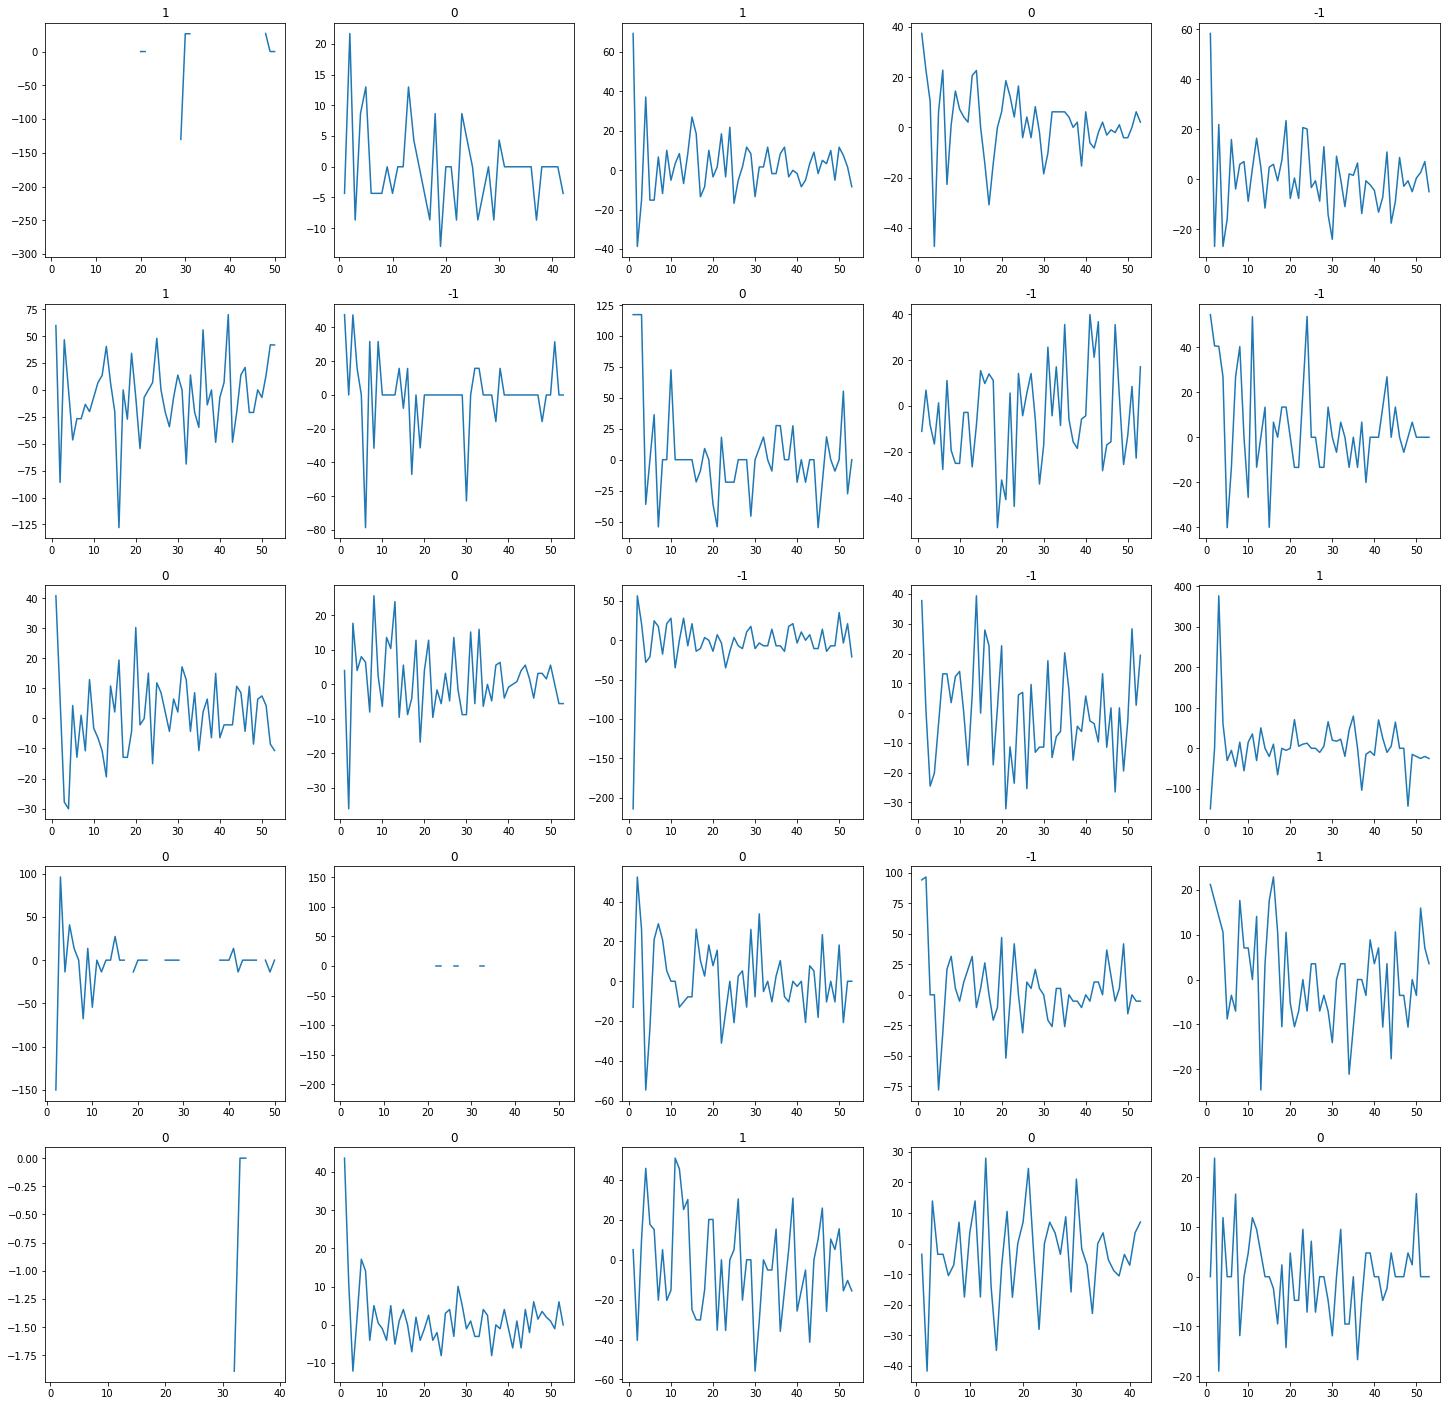

In [9]:
to_p = pd.concat([train,y_tr.drop('ID',axis=1)],axis=1).sample(25)
y_tp = to_p['reod']
to_p.drop('reod',axis=1,inplace=True)

plt.figure(figsize=(25,25))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.plot(np.arange(1,54), to_p.iloc[i,3:])
    plt.title(y_tp.iloc[i])
plt.show()

Some assets have weird opening prices. We may consider dropping the first 3-4 opening prices. 

In [10]:
(train.isna().sum()/len(train)).sort_values(ascending=False)

r44      0.12
r2       0.12
r45      0.12
r43      0.12
r42      0.12
r47      0.12
r48      0.12
r46      0.12
r50      0.12
r51      0.12
r49      0.12
r1       0.11
r52      0.11
r5       0.11
r3       0.11
r4       0.11
r32      0.11
r38      0.11
r35      0.11
r39      0.11
r41      0.11
r6       0.11
r33      0.11
r37      0.11
r11      0.11
r36      0.11
r30      0.11
r8       0.11
r31      0.11
r40      0.11
r9       0.11
r34      0.11
r29      0.11
r27      0.11
r26      0.11
r10      0.11
r12      0.11
r28      0.10
r25      0.10
r20      0.10
r21      0.10
r24      0.10
r23      0.10
r7       0.10
r15      0.10
r19      0.10
r17      0.10
r22      0.10
r13      0.10
r18      0.10
r16      0.10
r14      0.10
r0       0.05
equity   0.00
day      0.00
ID       0.00
dtype: float64

Almost 12% of missing values. We will need to deal with these carefully. 


Some curves are almost empty. 

In [11]:
train.groupby('equity').size()

equity
0       503
1       503
2       503
3       503
4       359
       ... 
1824    454
1825    142
1826    503
1827    503
1828    503
Length: 1829, dtype: int64

1894 different assets. 

In [12]:
(train.groupby('equity').size() == 503).sum()/len(train.groupby('equity').size())

0.8272279934390377

82% of the assets have 505 days of data. 


<AxesSubplot:ylabel='Count'>

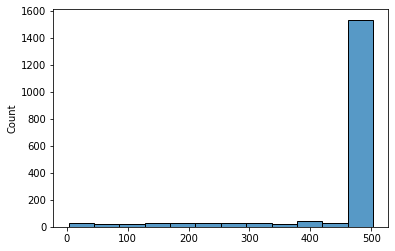

In [13]:
sns.histplot(train.groupby('equity').size())

## The target

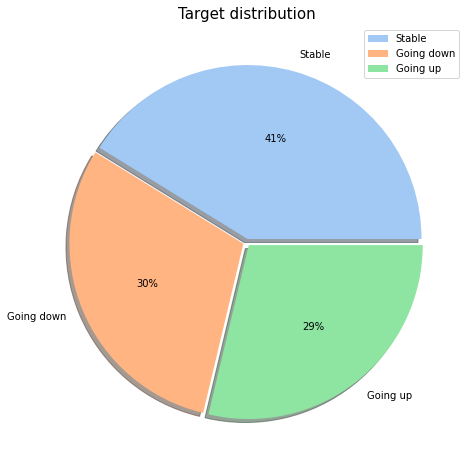

In [14]:
plt.figure(figsize= (12,8))
colors = sns.color_palette('pastel')[0:5]
plt.pie(x = y_tr.reod.value_counts(),labels = ["Stable","Going down","Going up"],explode = [.02,.02,.02],shadow = True,colors = colors,autopct='%.0f%%')
plt.legend()
plt.title("Target distribution",fontsize=15)
plt.show()

Quite evenly distributed, we will not need to stratify sampling too much. 

Let's concatenate the target with the training set for now.

In [15]:
full_data = pd.concat([train,y_tr['reod']],axis=1).drop('ID',axis=1)
full_data

,day,equity,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,r17,r18,r19,r20,r21,r22,r23,r24,r25,r26,r27,r28,r29,r30,r31,r32,r33,r34,r35,r36,r37,r38,r39,r40,r41,r42,r43,r44,r45,r46,r47,r48,r49,r50,r51,r52,reod
0,249,1488,0.00,NaN,NaN,NaN,0.00,NaN,NaN,-68.03,-34.25,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN,0.00,137.93,0.00,NaN,NaN,-102.39,NaN,NaN,NaN,0.00,NaN,-34.36,NaN,0.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,NaN,NaN,0.00,0
1,272,107,-9.76,0.00,-12.21,46.44,34.08,0.00,41.24,12.08,-26.54,19.32,48.22,23.99,-7.18,-26.34,-2.40,0.00,-12.01,0.00,0.00,19.24,12.00,0.00,-16.78,0.00,-38.42,-19.29,0.00,14.49,14.46,-21.68,-45.87,-9.70,9.71,14.55,2.42,2.42,0.00,4.85,9.70,14.52,0.00,16.95,2.42,-4.83,-16.92,-4.84,4.84,0.00,7.26,-9.68,-19.38,9.71,26.68,0
2,323,1063,49.85,0.00,0.00,-26.64,-23.66,-22.14,49.12,53.61,-4.70,-28.27,0.00,-33.01,6.30,-31.45,-3.15,-26.78,33.18,-9.45,40.98,-4.71,-17.26,25.14,4.71,-17.27,15.73,-18.85,-3.93,3.15,18.12,5.50,9.43,4.71,0.00,-1.57,0.78,10.99,-4.70,-20.41,-36.21,-38.73,-4.76,16.67,-68.08,-6.37,1.59,6.37,-49.32,-9.59,-6.40,22.41,-6.39,7.99,15.96,-1
3,302,513,0.00,NaN,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,11.59,NaN,NaN,NaN,0.00,NaN,0.00,0.00,NaN,0.00,NaN,NaN,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0
4,123,1465,-123.84,-115.18,-26.44,0.00,42.42,10.56,0.00,-47.57,21.28,-10.63,-31.91,21.32,-53.19,-32.05,21.46,-32.12,-53.65,10.79,43.10,0.00,-32.22,-10.76,48.47,21.44,-42.83,42.96,10.71,-10.70,16.06,10.70,-10.68,0.00,-26.74,-37.53,32.29,-10.73,-26.88,26.94,-21.48,64.52,26.70,-42.55,-21.39,-5.36,-21.44,-21.48,10.78,-21.55,-5.40,-10.81,5.41,-32.47,43.43,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843294,297,123,3.96,0.00,-70.34,74.24,-0.56,0.00,-23.63,-9.57,-5.07,0.00,0.00,29.88,0.00,-16.92,0.00,-7.34,-8.48,-7.35,-13.01,-25.48,-1.14,3.97,1.13,7.38,-15.87,2.84,19.30,-21.53,6.25,10.21,-21.54,18.18,9.64,-7.93,6.80,0.00,-7.94,5.68,5.10,-1.13,-5.10,-24.98,18.22,-10.80,1.71,0.00,-3.98,2.28,-21.62,-1.71,9.12,0.00,9.11,1
843295,16,1501,0.00,-183.49,-13.19,46.24,0.00,-39.60,13.25,0.00,0.00,19.89,39.87,0.00,13.32,33.24,19.88,0.00,-6.61,0.00,19.83,0.00,-32.98,33.09,-32.98,0.00,-16.53,-6.62,0.00,26.51,6.61,0.00,6.61,0.00,0.00,0.00,-33.00,-39.60,0.00,-19.88,0.00,-16.60,9.98,0.00,26.58,0.00,6.62,0.00,19.85,0.00,-26.42,6.62,0.00,0.00,-19.88,-1
843296,166,1231,37.02,2.93,-3.67,16.89,-4.03,13.56,-4.39,-14.28,-0.73,9.53,-0.73,-9.88,-1.28,-9.15,7.69,-6.59,9.16,28.19,-1.83,13.14,-2.92,8.02,5.46,-4.37,0.00,-5.10,-8.02,7.66,4.74,2.55,0.36,-15.29,-7.29,2.55,-5.29,-7.30,-22.64,6.59,12.44,8.41,-2.19,13.88,1.82,2.92,-3.28,-1.46,-3.65,-1.10,-13.51,2.92,-6.21,9.69,-3.66,0
843297,297,747,34.45,15.10,-35.61,19.25,-16.46,-26.12,20.68,-2.75,2.75,-11.01,-13.78,22.09,26.17,-9.62,4.13,12.37,10.98,-8.91,30.17,11.62,-13.66,4.10,17.78,-1.37,-15.72,0.00,-5.47,-2.74,-19.18,14.41,28.78,-4.10,4.10,-2.74,-2.74,-0.68,0.00,-10.26,-9.59,2.74,-28.79,-19.25,15.16,-20.65,-5.52,-6.90,9.67,1.38,6.90,-11.04,33.16,13.77,12.38,1


In [16]:
res = full_data.groupby('reod')['r52'].agg(['mean','std','min','max'])
res

,mean,std,min,max
reod,,,,
-1,0.18,21.77,-1037.04,1104.97
0,-0.10,16.95,-575.78,797.12
1,-0.11,21.15,-990.99,901.64


In [17]:
res["mean"].index

Int64Index([-1, 0, 1], dtype='int64', name='reod')

Interesting ! In average, the mean of the assets going down is much higher than the ones being stable or going up. 

There is a strong indication that there is a reverse trend in the last 2 hours.

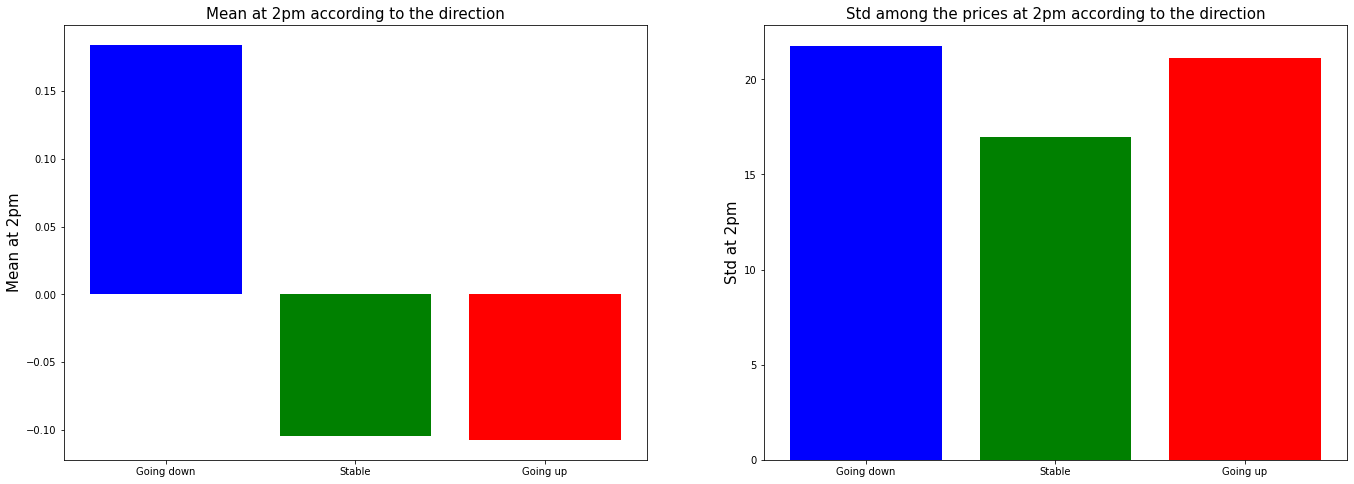

In [11]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(23,8))

ax1.bar( ["Going down","Stable",'Going up'],res['mean'],label = ["Going down","Stable",'Going up'],color=['b','g','r'] )
ax1.set_ylabel('Mean at 2pm',fontsize=15)
ax1.set_title("Mean at 2pm according to the direction",fontsize = 15)


ax2.bar( ["Going down","Stable",'Going up'],res['std'],label = ["Going down","Stable",'Going up'],color=['b','g','r'] )
ax2.set_ylabel('Std at 2pm',fontsize=15)
ax2.set_title("Std among the prices at 2pm according to the direction",fontsize = 15)


plt.show()

## Missing values

In [19]:
isnum = (full_data.dtypes == 'float64')
ret_col = isnum.loc[isnum.values == True].index.tolist()
# The columns containing the returns

To estimate various quantities along the rows, we need to drop assets with too much missing values. Let us look for a reasonable threshold. 


In [20]:
full_data['pctmissing'] = 100*full_data[ret_col].isna().sum(axis=1)/full_data[ret_col].shape[1]

<AxesSubplot:xlabel='pctmissing', ylabel='Count'>

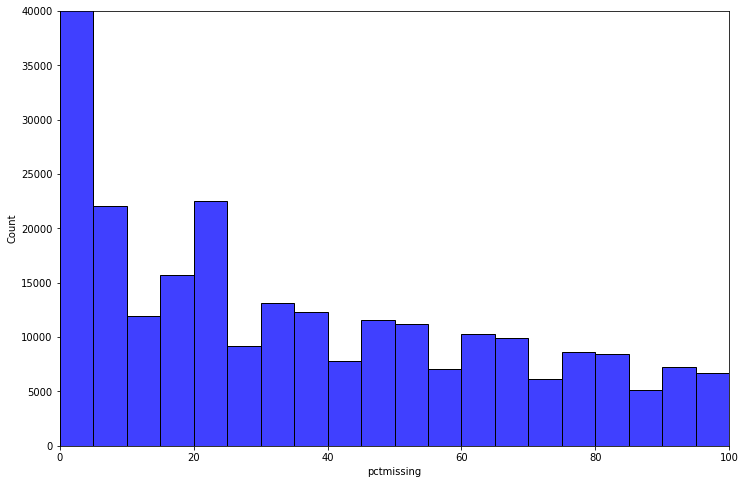

In [21]:
plt.figure(figsize=(12,8))
plt.xlim((0,100))
plt.ylim((0,40000))
sns.histplot(data = full_data, x ='pctmissing',bins = 20,color = 'blue')

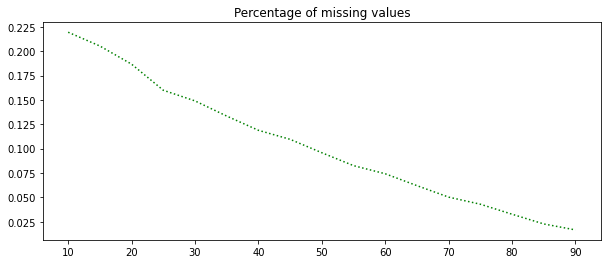

In [22]:
x = np.arange(10,95,5)
miss = [len(full_data.loc[full_data['pctmissing'] >=i])/len(full_data) for i in x]
plt.figure(figsize=(10,4))
plt.plot(x,miss,c = 'g',linestyle = ':')
plt.title("Percentage of missing values")
plt.show()

Let's plot some rows for various percentage values to see if interpolation seems reasonable or not. 

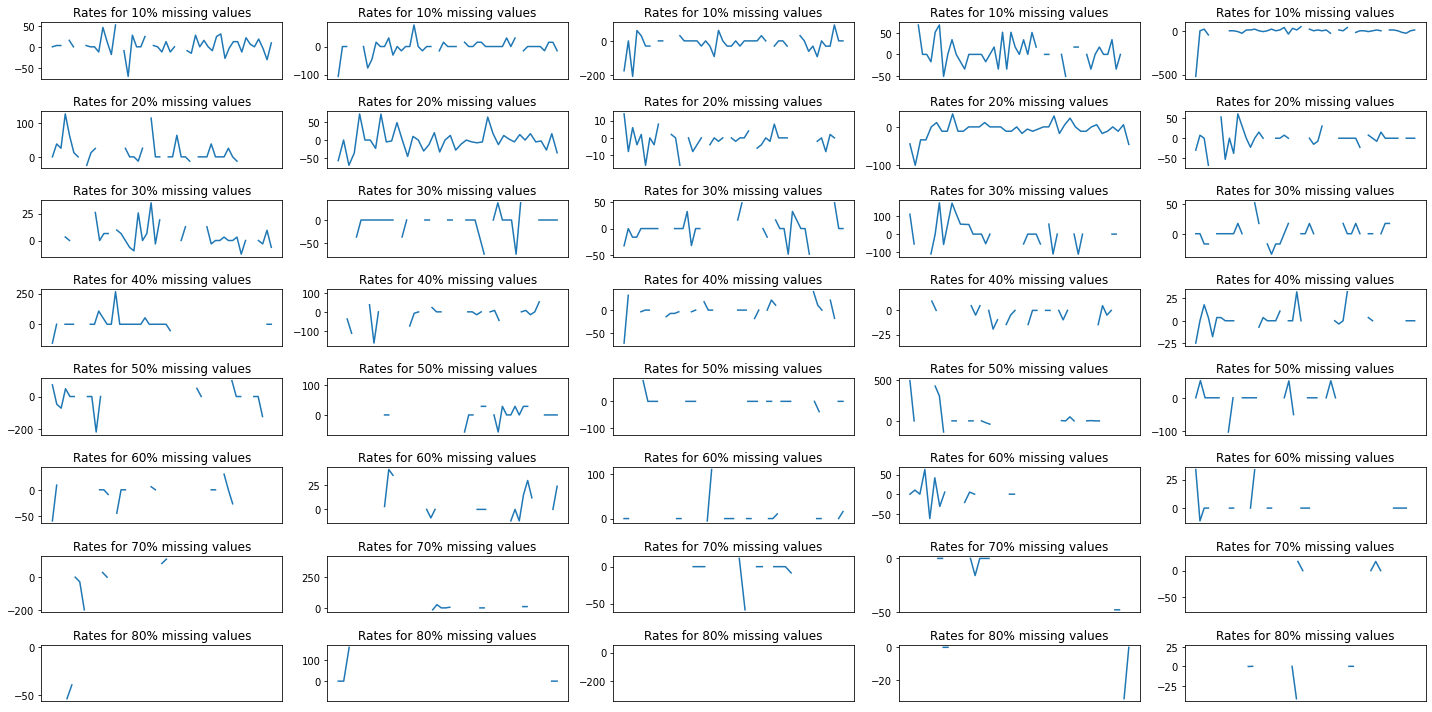

In [23]:
fig = plt.figure(figsize=(20,10))

for i,thre in enumerate(range(10,90,10)):
    retu = full_data.loc[(full_data["pctmissing"] < thre + 5)&(full_data["pctmissing"] >= thre)]
    to_pl = retu.sample(5)
    for j in range(5):        
        plt.subplot(8,5,5*i+j+1)
        plt.plot(to_pl[ret_col].iloc[j,:])
        plt.title(f"Rates for {thre}% missing values")
        plt.xticks([])
plt.tight_layout()
plt.show()

Clearly, it does not make sense to interpolate anything for 80% missing values and above. Let us fix the threshold at 20% (for now).
So first, what does y look like for the values we will drop ? 

In [35]:
row_remain = full_data.loc[full_data['pctmissing'] <= 20].index
row_remov = full_data.loc[full_data['pctmissing'] > 20].index
y_tr.loc[row_remov]['reod'].value_counts()

 0    104733
-1     27206
 1     25473
Name: reod, dtype: int64

It seems that for all thresholds the repartition of the target remains the same; even with very little values, we now what y is (and it has not been set to constant == 0 for example).

Text(0.5, 1.0, 'Distribution of the target when there is less than 20% of values missing')

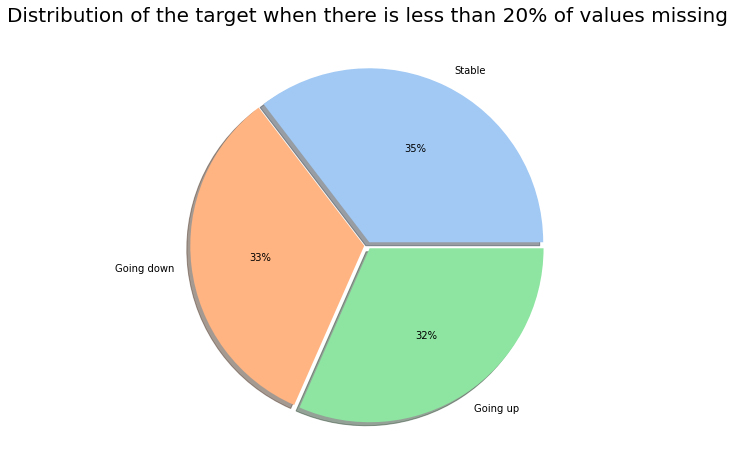

In [25]:
plt.figure(figsize=(10,8))
plt.pie(x = y_tr.loc[row_remain]['reod'].value_counts(),labels = ["Stable","Going down","Going up"],explode = [.02,.02,.02],shadow = True,colors = colors,autopct='%.0f%%')
plt.title("Distribution of the target when there is less than 20% of values missing",fontsize=20)

This is interesting as well: when we remove the missing values, the target seems almost uniformly distributed. 

In [21]:
# fd_nm = full data non missing values ! 
fd_nm = full_data.loc[full_data['pctmissing'] <= 20]
it = fd_nm[ret_col].interpolate(axis=1)
fd_nm[ret_col] = it


In [22]:
fd_nm.isna().sum()

day               0
equity            0
r0            25513
r1             1878
r2              611
r3              180
r4               67
r5               28
r6                9
r7                6
r8                4
r9                0
r10               0
r11               0
r12               0
r13               0
r14               0
r15               0
r16               0
r17               0
r18               0
r19               0
r20               0
r21               0
r22               0
r23               0
r24               0
r25               0
r26               0
r27               0
r28               0
r29               0
r30               0
r31               0
r32               0
r33               0
r34               0
r35               0
r36               0
r37               0
r38               0
r39               0
r40               0
r41               0
r42               0
r43               0
r44               0
r45               0
r46               0
r47               0


Only missing values are at the beginning of the day; we simply fill the missing stuff with the mean along the row. Anyways, we are still early in the day, this should not impact the behavior at the 
end of the day too much in general. 

In [23]:
fd_num=fd_nm[ret_col]
fd_num.loc[(fd_num.isna()).sum(axis=1) != 0] = fd_num.loc[(fd_num.isna()).sum(axis=1) != 0].apply(lambda row: row.fillna(row.mean()), axis=1)
fd_nm[ret_col] = fd_num

In [24]:
fd_nm.isna().sum().sum()

0

Amazing ! No more missing values for now ! 

In [30]:
fd_nm.day.value_counts().sort_values()

395    1134
274    1302
443    1304
293    1305
275    1308
       ... 
237    1578
230    1579
31     1579
488    1587
347    1589
Name: day, Length: 497, dtype: int64

In [31]:
fd_nm.drop('pctmissing',axis=1,inplace = True)

In [32]:
fd_nm.columns

Index(['day', 'equity', 'r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8',
       'r9', 'r10', 'r11', 'r12', 'r13', 'r14', 'r15', 'r16', 'r17', 'r18',
       'r19', 'r20', 'r21', 'r22', 'r23', 'r24', 'r25', 'r26', 'r27', 'r28',
       'r29', 'r30', 'r31', 'r32', 'r33', 'r34', 'r35', 'r36', 'r37', 'r38',
       'r39', 'r40', 'r41', 'r42', 'r43', 'r44', 'r45', 'r46', 'r47', 'r48',
       'r49', 'r50', 'r51', 'r52', 'reod'],
      dtype='object')

All days have a quite similar number of assets. 

# Feature engineering

Now we delve a bit deeply into the data. Can we extract some useful features from our reduced dataset ? 

Let us note that we are only dealing with 80% or so of the original data. 

In [33]:
fd_nm.groupby("reod")["day"].size()

reod
-1    226433
 0    242732
 1    216722
Name: day, dtype: int64

The target seems to be well distributed among days. 

For example, how does the variance in the last hour affect the target ? 

## Variance of the last hour

In [34]:
#We create the column "last hour std". 
fd_nm['lsthstd'] = fd_nm.iloc[:,-14:-1].std(axis=1)

Text(0.5, 0, 'Histogramm of the last hour variances')

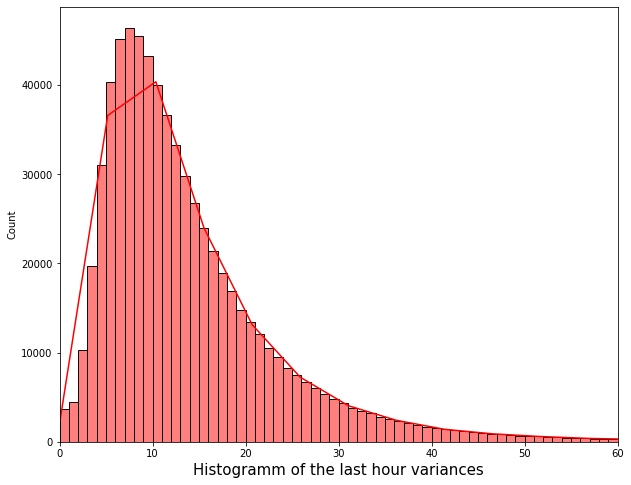

In [35]:
plt.figure(figsize=(10,8))
plt.xlim((0,60))
sns.histplot( data = fd_nm,x = 'lsthstd',binwidth = 1,color = 'r',kde=True)
plt.xlabel("Histogramm of the last hour variances",fontsize = 15)

In [36]:
fd_nm.groupby('reod')['lsthstd'].describe()

,count,mean,std,min,25%,50%,75%,max
reod,,,,,,,,
-1,226433.00,16.10,13.65,0.00,8.49,12.86,19.67,1030.05
0,242732.00,11.26,9.03,0.00,5.94,9.06,13.92,597.00
1,216722.00,15.98,13.20,0.00,8.37,12.72,19.58,666.08


Generally speaking, if the variance was low in the last hour the target will be 0. Quite intuitive. 

<AxesSubplot:xlabel='reod', ylabel='lsthstd'>

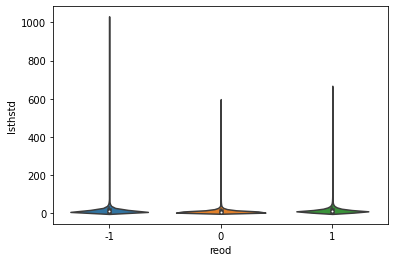

In [37]:
sns.violinplot(data = fd_nm, x = 'reod',y='lsthstd')

In [38]:
fd_nm['red_var'] = fd_nm.loc[fd_nm['lsthstd'] < 40,'lsthstd']

Text(0, 0.5, 'Reduced variance')

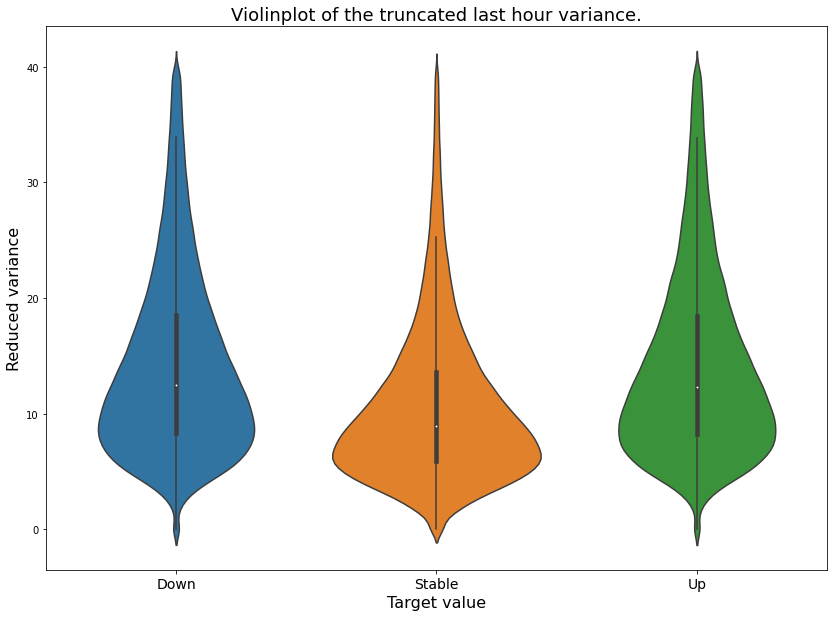

In [39]:
plt.figure(figsize=(14,10))
sns.violinplot(data = fd_nm, x = 'reod',y='red_var')
plt.title("Violinplot of the truncated last hour variance.",fontsize = 18)
plt.xticks([0,1,2],["Down","Stable",'Up'],fontsize=14)
plt.xlabel("Target value",fontsize=16)
plt.ylabel("Reduced variance",fontsize=16)

We observe more or less the same thing. Should we keep this feature ? Not so clear for the moment.

## Tendency over the last hour(s).

In [40]:
#We create 4 columns tend_1, tend_2,tend_3,tend_4. 
#fd_nm['tend_1'] = fd_nm['r52']-fd_nm['r40']
#fd_nm['tend_2'] = (fd_nm['r52']-fd_nm['r28'])/2
#fd_nm['tend_3'] = (fd_nm['r52']-fd_nm['r16'])/3
#fd_nm['tend_4'] = (fd_nm['r52']-fd_nm['r4'])/4

In [41]:
''' sns.set_palette("bright")
plt.style.use('seaborn-pastel')
plt.figure(figsize=(14,10))
sns.histplot(data = fd_nm, x = 'tend_1',hue='reod')
plt.xlim((-80,80))
plt.ylim((0,3000)) 
'''

' sns.set_palette("bright")\nplt.style.use(\'seaborn-pastel\')\nplt.figure(figsize=(14,10))\nsns.histplot(data = fd_nm, x = \'tend_1\',hue=\'reod\')\nplt.xlim((-80,80))\nplt.ylim((0,3000)) \n'

In [42]:
'''sns.set_palette("bright")
plt.style.use('seaborn-pastel')
plt.figure(figsize=(14,10))
sns.histplot(data = fd_nm, x = 'tend_2',hue='reod')
plt.xlim((-80,80))
plt.ylim((0,3000))

sns.set_palette("bright")
plt.style.use('seaborn-pastel')
plt.figure(figsize=(14,10))
sns.histplot(data = fd_nm, x = 'tend_3',hue='reod')
plt.xlim((-80,80))
plt.ylim((0,3000))

sns.set_palette("bright")
plt.style.use('seaborn-pastel')
plt.figure(figsize=(14,10))
sns.histplot(data = fd_nm, x = 'tend_4',hue='reod')
plt.xlim((-80,80))
plt.ylim((0,3000))
'''

'sns.set_palette("bright")\nplt.style.use(\'seaborn-pastel\')\nplt.figure(figsize=(14,10))\nsns.histplot(data = fd_nm, x = \'tend_2\',hue=\'reod\')\nplt.xlim((-80,80))\nplt.ylim((0,3000))\n\nsns.set_palette("bright")\nplt.style.use(\'seaborn-pastel\')\nplt.figure(figsize=(14,10))\nsns.histplot(data = fd_nm, x = \'tend_3\',hue=\'reod\')\nplt.xlim((-80,80))\nplt.ylim((0,3000))\n\nsns.set_palette("bright")\nplt.style.use(\'seaborn-pastel\')\nplt.figure(figsize=(14,10))\nsns.histplot(data = fd_nm, x = \'tend_4\',hue=\'reod\')\nplt.xlim((-80,80))\nplt.ylim((0,3000))\n'

General tendencies are quite depressing... Nothing really interesting around there. Only remarkable thing is that the distribution ges more concentrated around 0 when we come closer towards the start of the day.

## Regrouping assets by ID

Text(0.5, 1.0, 'Mean target value for data regrouped by asset.')

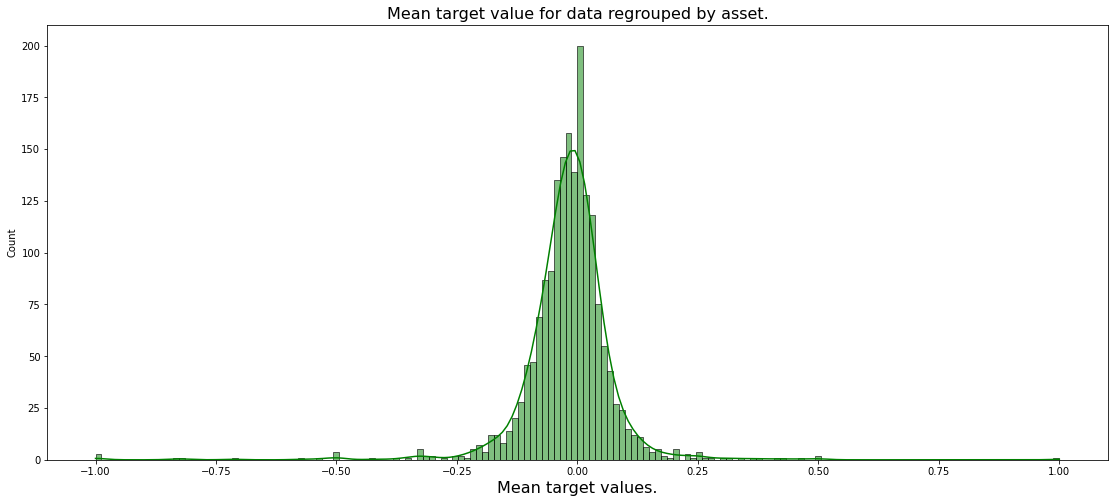

In [43]:
#Are some tendencies in the mean target value according to the asset ? 
plt.figure(figsize=(19,8))
sns.histplot(fd_nm.groupby('equity')['reod'].mean(),kde = True,color='g')
plt.xlim((-1.1,1.1))
plt.xlabel("Mean target values.",fontsize = 16)
plt.title("Mean target value for data regrouped by asset.",fontsize = 16)

Very gaussianly distributed...

<AxesSubplot:ylabel='Count'>

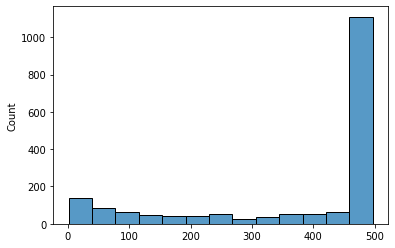

In [44]:
sns.histplot(fd_nm.groupby('equity').size())

For most of the assets, we have more or less 500 days data. 

<AxesSubplot:xlabel='r52', ylabel='Count'>

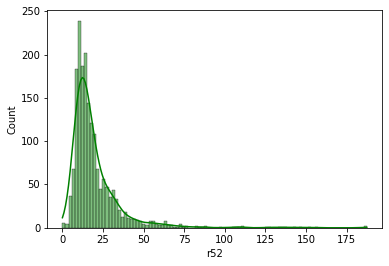

In [45]:
sns.histplot(fd_nm.groupby('equity')['r52'].std(),kde = True,color='g')

In [46]:
fd_nm['DbD_varn'] = fd_nm.groupby('equity')['r52'].transform('std')
q1 = fd_nm.groupby('equity')['r52'].std().quantile(.25)
q2 = fd_nm.groupby('equity')['r52'].std().quantile(.5)
q3 = fd_nm.groupby('equity')['r52'].std().quantile(.75)
fd_nm['DbD_var'] = pd.cut(fd_nm['DbD_varn'],[0,q1,q2,q3,np.inf],labels = ['tiny','small','medium','large'])

In [47]:
fd_nm.groupby(['DbD_var','reod']).size()

DbD_var  reod
tiny     -1      51252
          0      98672
          1      51462
small    -1      64898
          0      70332
          1      60219
medium   -1      65008
          0      49853
          1      62200
large    -1      45266
          0      23866
          1      42832
dtype: int64

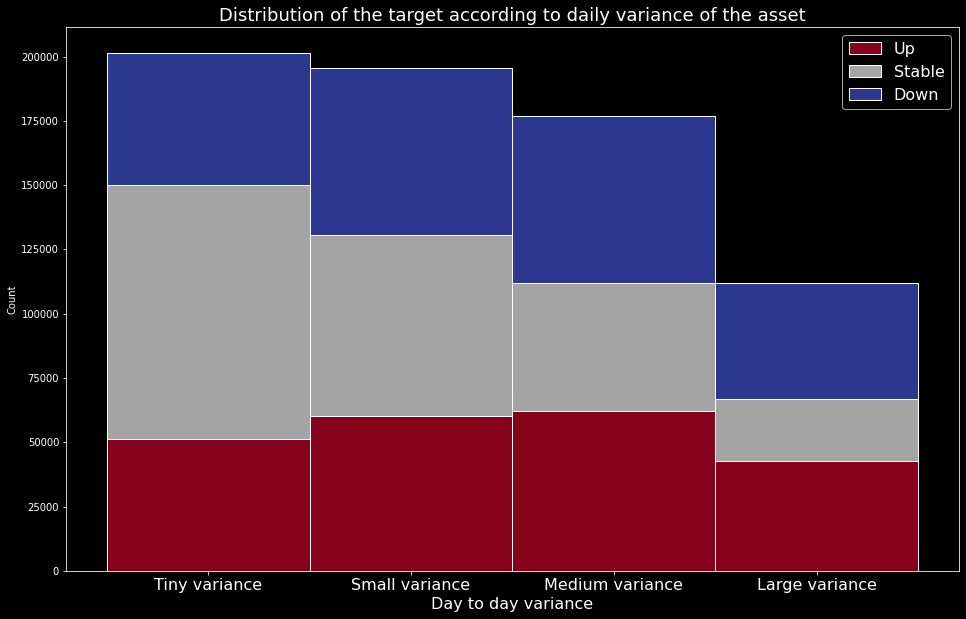

In [48]:
plt.style.use('dark_background')
plt.figure(figsize = (16,10))
sns.histplot(data = fd_nm,x = 'DbD_var',hue='reod', multiple="stack",palette='coolwarm')
plt.title('Distribution of the target according to daily variance of the asset',fontsize = 18)
plt.xlabel('Day to day variance',fontsize=16)
plt.xticks([0,1,2,3],["Tiny variance",'Small variance','Medium variance','Large variance'],fontsize=16)
plt.legend(['Up','Stable','Down'],fontsize=16)


Great! Here we have an informative feature: for a given asset, the smallest the day to day variance the more likely the target will be 0. 

In [49]:
fd_nm.rename(columns={"DbD_var" : 'AssetVar'},inplace=True)

In [25]:
fd_nm['DbD_med'] = fd_nm.groupby('equity')['r52'].transform('median')

In [32]:
fd_nm.groupby('equity')['DbD_med'].mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.SeriesGroupBy object at 0x0000026803DDC9D0>>

In [ ]:
q1 = fd_nm.groupby('equity')['r52'].std().quantile(.25)
q2 = fd_nm.groupby('equity')['r52'].std().quantile(.5)
q3 = fd_nm.groupby('equity')['r52'].std().quantile(.75)
fd_nm['DbD_var'] = pd.cut(fd_nm['DbD_varn'],[0,q1,q2,q3,np.inf],labels = ['tiny','small','medium','large'])

In [50]:
'''q1 = fd_nm.groupby('equity')['lsthstd'].mean().quantile(.25)
q2 = fd_nm.groupby('equity')['lsthstd'].mean().quantile(.5)
q3 = fd_nm.groupby('equity')['lsthstd'].mean().quantile(.75)
fd_nm['intraDayvol'] = pd.cut(fd_nm['DbD_varn'],[0,q1,q2,q3,np.inf],labels = ['tiny_Intra','small_Intra','medium_Intra','large_Intra'])

pd.pivot_table(data = fd_nm, index = 'intraDayvol',columns = 'DbD_var',values = 'reod',aggfunc='size')

It seems that day by day and intraday volatilities are very much connected for a given asset. We should most likely drop one of these features.

q1 = fd_nm.groupby('equity')['tend_1'].mean().quantile(.25)
q2 = fd_nm.groupby('equity')['tend_1'].mean().quantile(.5)
q3 = fd_nm.groupby('equity')['tend_1'].mean().quantile(.75)
fd_nm['Shortterm_tendency_by_Asset'] = pd.cut(fd_nm['DbD_varn'],[-np.inf,q1,q2,q3,np.inf],labels = ['1stqt','2ndqt','3rdqt','4thqt'])

pd.pivot_table(data = fd_nm, index = 'Shortterm_tendency_by_Asset',columns = 'DbD_var',values = 'reod',aggfunc='size')

fd_nm['Shortterm_tendency_by_Asset'].value_counts()
'''

"q1 = fd_nm.groupby('equity')['lsthstd'].mean().quantile(.25)\nq2 = fd_nm.groupby('equity')['lsthstd'].mean().quantile(.5)\nq3 = fd_nm.groupby('equity')['lsthstd'].mean().quantile(.75)\nfd_nm['intraDayvol'] = pd.cut(fd_nm['DbD_varn'],[0,q1,q2,q3,np.inf],labels = ['tiny_Intra','small_Intra','medium_Intra','large_Intra'])\n\npd.pivot_table(data = fd_nm, index = 'intraDayvol',columns = 'DbD_var',values = 'reod',aggfunc='size')\n\nIt seems that day by day and intraday volatilities are very much connected for a given asset. We should most likely drop one of these features.\n\nq1 = fd_nm.groupby('equity')['tend_1'].mean().quantile(.25)\nq2 = fd_nm.groupby('equity')['tend_1'].mean().quantile(.5)\nq3 = fd_nm.groupby('equity')['tend_1'].mean().quantile(.75)\nfd_nm['Shortterm_tendency_by_Asset'] = pd.cut(fd_nm['DbD_varn'],[-np.inf,q1,q2,q3,np.inf],labels = ['1stqt','2ndqt','3rdqt','4thqt'])\n\npd.pivot_table(data = fd_nm, index = 'Shortterm_tendency_by_Asset',columns = 'DbD_var',values = 'reod',

## Variances by day. 

We define a day with high variance if the mean variance of the assets over this day is high. Does this influence the target ? 

In [51]:
fd_nm["DailyVar"] = fd_nm[ret_col].std(axis=1)
fd_nm['day_var'] = fd_nm.groupby('day')["DailyVar"].transform('mean')


fd_nm['DayVariance'] = pd.qcut(fd_nm['day_var'],[0,0.25,0.75,1],labels = ['small day variance','medium day variance','big day variance'])

In [53]:
fd_nm.drop(['DailyVar','day_var'],axis=1,inplace=True)

In [54]:
fd_nm.groupby('DayVariance')['reod'].describe()

,count,mean,std,min,25%,50%,75%,max
DayVariance,,,,,,,,
small day variance,171933.00,-0.02,0.78,-1.00,-1.00,0.00,1.00,1.00
medium day variance,342942.00,-0.03,0.80,-1.00,-1.00,0.00,1.00,1.00
big day variance,171012.00,0.02,0.83,-1.00,-1.00,0.00,1.00,1.00


Little bias: small days and medium days variance have a slight tendency to go down, big variance have a slight tendency to go up. This feature should definitely be kept ! 

## Other daily indicators

## Bollinger bands indicators

In [55]:
# looking for the most meaningful values for SMA and sigma
res = []
for sma in  range(14,30):
    for sigma in np.linspace(1.4,2.6,10):
        fd_nm["BolInd"] = (fd_nm['r52'] > fd_nm[ret_col].iloc[:,-sma:].mean(axis=1) + sigma*fd_nm[ret_col].iloc[:,-sma:].std(axis=1)).astype(int)
        fd_nm["BolInd"] -= (fd_nm['r52'] < fd_nm[ret_col].iloc[:,-sma:].mean(axis=1) - sigma*fd_nm[ret_col].iloc[:,-sma:].std(axis=1)).astype(int)
        if len(fd_nm.groupby("BolInd")['reod']) == 3:
            res.append([fd_nm.groupby("BolInd")['reod'].mean()[-1] - fd_nm.groupby("BolInd")['reod'].mean()[1],sma,sigma])

KeyboardInterrupt: 

In [ ]:
best_ind = np.argmax([np.abs(res[i][0]) for i in range(len(res))])
sm_max = res[best_ind][1]
sigma_max = res[best_ind][2]
sm_max,sigma_max

So let us take SMA = 23 and sigma = 2 for now. 

In [ ]:
sma,sigma = 23,2
fd_nm["BolInd"] = (fd_nm['r52'] > fd_nm[ret_col].iloc[:,-sma:].mean(axis=1) + sigma*fd_nm[ret_col].iloc[:,-sma:].std(axis=1)).astype(int)
fd_nm["BolInd"] -= (fd_nm['r52'] < fd_nm[ret_col].iloc[:,-sma:].mean(axis=1) - sigma*fd_nm[ret_col].iloc[:,-sma:].std(axis=1)).astype(int)

sns.countplot(data = fd_nm,x = 'BolInd',hue="reod")

Totally unconvincing,also for different values of SMA and sigma... Let us remove this indicator. 

In [ ]:
fd_nm.drop('BolInd',axis=1,inplace=True)

## Moving averages

In [ ]:
sma_long = 30
sma_short = 6

fd_nm["longsma"] = fd_nm[ret_col].iloc[:,-sma_long:].mean(axis=1) 
fd_nm["shortsma"] = fd_nm[ret_col].iloc[:,-sma_short:].mean(axis=1) 
fd_nm['SMAind'] = np.where(fd_nm["longsma"] > fd_nm["shortsma"],-1,1)
fd_nm.drop(['longsma','shortsma'],axis=1,inplace=True)

sns.countplot(data = fd_nm,x = 'SMAind',hue="reod")

This looks like a weak indicator in the case where SMA_short > SMA_large, in which case there is a small tendency to target = -1. So let us optimize on sma_short and sma_long on these parameters. 

In [ ]:
res =[]
for sma_short in range(3,12):
    for sma_long in range(15,35):
        fd_nm["longsma"] = fd_nm[ret_col].iloc[:,-sma_long:].mean(axis=1) 
        fd_nm["shortsma"] = fd_nm[ret_col].iloc[:,-sma_short:].mean(axis=1) 
        fd_nm['SMAind'] = np.where(fd_nm["longsma"] > fd_nm["shortsma"],-1,1)
        res.append([(fd_nm.loc[fd_nm.SMAind==1]['reod'] == -1).sum() - (fd_nm.loc[fd_nm.SMAind==1]['reod'] == 1).sum(),sma_short,sma_long])
        

In [56]:
sma_long,sma_short = 19,11
fd_nm["longsma"] = fd_nm[ret_col].iloc[:,-sma_long:].mean(axis=1) 
fd_nm["shortsma"] = fd_nm[ret_col].iloc[:,-sma_short:].mean(axis=1) 
fd_nm['SMAind'] = np.where(fd_nm["longsma"] > fd_nm["shortsma"],-1,1)
(fd_nm.loc[fd_nm.SMAind==1]['reod'] == -1).sum() - (fd_nm.loc[fd_nm.SMAind==1]['reod'] == 1).sum()

10246

In [ ]:
sns.countplot(data = fd_nm,x = 'SMAind',hue="reod")

Not crazily convincing, but let us keep it for now. 

In [ ]:
fd_nm.drop(["longsma",'shortsma'],axis=1,inplace=True)

In [ ]:
fd_nm.drop('DbD_varn',axis=1,inplace=True)

In [ ]:
fd_nm

In [155]:
def prepare_data(threshold = 20,end_of_day = 12,start_of_day = 3):
    
    # beware start_of_day + end_of_day <= 52!!
    
    #load the csv files
    train = pd.read_csv('input_training.csv')
    y_tr = pd.read_csv('output_train.csv')
    
    #Getting the columns containing the returns
    full_data = pd.concat([train,y_tr['reod']],axis=1).drop('ID',axis=1)
    isnum = (full_data.dtypes == 'float64')
    ret_col = isnum.loc[isnum.values == True].index.tolist()
    
    full_data['pctmissing'] = 100*full_data[ret_col].isna().sum(axis=1)/full_data[ret_col].shape[1]
    fd_nm = full_data.loc[full_data['pctmissing'] <= threshold]
    #We decide (arbitrarily, see above) to interpolate when there is less than 20% of missing values.
    
    fd_nm[ret_col] = fd_nm[ret_col].interpolate(axis=1)
    fd_num=fd_nm[ret_col]
    fd_num.loc[(fd_num.isna()).sum(axis=1) != 0] = fd_num.loc[(fd_num.isna()).sum(axis=1) != 0].apply(lambda row: row.fillna(row.mean()), axis=1)
    fd_nm[ret_col] = fd_num
    # We fill the missing values in two ways: _ first we interpolate linearly
    #                                         _ then we fill the start of the row with the mean of the row. 
    
    if fd_nm.isna().sum().sum() != 0:
        print("There are still some missing values in the data !")
        return -1
    
    # Features engineering: first variance by equity.
    fd_nm['DbD_varn'] = fd_nm.groupby('equity')['r52'].transform('std')
    q1 = fd_nm.groupby('equity')['r52'].std().quantile(.25)
    q2 = fd_nm.groupby('equity')['r52'].std().quantile(.5)
    q3 = fd_nm.groupby('equity')['r52'].std().quantile(.75)
    fd_nm['AssetVar'] = pd.cut(fd_nm['DbD_varn'],[0,q1,q2,q3,np.inf],labels = ['tiny','small','medium','large'])
    
    # Variance by day
    fd_nm["DailyVar"] = fd_nm[ret_col].std(axis=1)
    fd_nm['day_var'] = fd_nm.groupby('day')["DailyVar"].transform('mean')
    fd_nm['DayVariance'] = pd.qcut(fd_nm['day_var'],[0,0.25,0.75,1],labels = ['small day variance','medium day variance','big day variance'])
    
    # Moving average indicators, optimized in sample.
    sma_long,sma_short = 19,11
    fd_nm["longsma"] = fd_nm[ret_col].iloc[:,-sma_long:].mean(axis=1) 
    fd_nm["shortsma"] = fd_nm[ret_col].iloc[:,-sma_short:].mean(axis=1) 
    fd_nm['SMAind'] = np.where(fd_nm["longsma"] > fd_nm["shortsma"],-1,1)
    fd_nm.drop(["longsma",'shortsma'],axis=1,inplace=True)
    
    a = fd_nm.isna().sum().sum()
    
    if  a != 0:
        print(f"There were {a} values missing. We drop the corresponding rows.")
        fd_nm.dropna(inplace=True)
        
    cat_cols = ['day','equity','AssetVar','DayVariance','SMAind']
    num_cols = ret_col[:3] + ret_col[-20:-1]
    all_data =fd_nm[cat_cols + num_cols]
    y = fd_nm.reod
    pct = len(all_data)/len(train)
    print(f'We finally use {pct}% of the initial data to run algos and fill the rest with zeros ! ')
    # Finally getting the data with the new features ! 
    return all_data, y
    
    

In [161]:
X,y = prepare_data(threshold = 40)

There were 8 values missing. We drop the corresponding rows.


In [163]:
y

1         0
2        -1
4        -1
5         0
6        -1
         ..
843294    1
843295   -1
843296    0
843297    1
843298   -1
Name: reod, Length: 743098, dtype: int64

## State of the art (to compile before moving on to predictions) !! 

In [7]:
full_data = pd.concat([train,y_tr['reod']],axis=1).drop('ID',axis=1)
isnum = (full_data.dtypes == 'float64')
ret_col = isnum.loc[isnum.values == True].index.tolist()
# The columns containing the returns
full_data['pctmissing'] = 100*full_data[ret_col].isna().sum(axis=1)/full_data[ret_col].shape[1]
fd_nm = full_data.loc[full_data['pctmissing'] <= 20]
#We decide (arbitrarily, see above) to interpolate when there is less than 2°% of missing values.
fd_nm[ret_col] = fd_nm[ret_col].interpolate(axis=1)
fd_num=fd_nm[ret_col]
fd_num.loc[(fd_num.isna()).sum(axis=1) != 0] = fd_num.loc[(fd_num.isna()).sum(axis=1) != 0].apply(lambda row: row.fillna(row.mean()), axis=1)
fd_nm[ret_col] = fd_num


In [10]:
# The whole process is explained in various places above. Here we count the number of missing values at the end, which should be 0. Please note that we have dropped a lot of rows (more or less 120k) for which there 
# were too much missing values to decently interpolate. We need to decide how to deal with this type of data before moving on; state of the art is simply putting them to 0 (which corresponds to 60% of what we observed on
# he training set) 
fd_nm.isna().sum().sum()


0

In [11]:
# Features engineering: first variance by equity.
fd_nm['DbD_varn'] = fd_nm.groupby('equity')['r52'].transform('std')
q1 = fd_nm.groupby('equity')['r52'].std().quantile(.25)
q2 = fd_nm.groupby('equity')['r52'].std().quantile(.5)
q3 = fd_nm.groupby('equity')['r52'].std().quantile(.75)
fd_nm['AssetVar'] = pd.cut(fd_nm['DbD_varn'],[0,q1,q2,q3,np.inf],labels = ['tiny','small','medium','large'])

In [13]:
# Variance by day
fd_nm["DailyVar"] = fd_nm[ret_col].std(axis=1)
fd_nm['day_var'] = fd_nm.groupby('day')["DailyVar"].transform('mean')
fd_nm['DayVariance'] = pd.qcut(fd_nm['day_var'],[0,0.25,0.75,1],labels = ['small day variance','medium day variance','big day variance'])

In [14]:
# Moving average indicators, optimized in sample.
sma_long,sma_short = 19,11
fd_nm["longsma"] = fd_nm[ret_col].iloc[:,-sma_long:].mean(axis=1) 
fd_nm["shortsma"] = fd_nm[ret_col].iloc[:,-sma_short:].mean(axis=1) 
fd_nm['SMAind'] = np.where(fd_nm["longsma"] > fd_nm["shortsma"],-1,1)
fd_nm.drop(["longsma",'shortsma'],axis=1,inplace=True)

In [19]:
fd_nm.dropna(inplace=True)



In [21]:
fd_nm.isna().sum()

day            0
equity         0
r0             0
r1             0
r2             0
              ..
AssetVar       0
DailyVar       0
day_var        0
DayVariance    0
SMAind         0
Length: 63, dtype: int64

# First predictions

## Purely categorical prediction

Just for the sake of the exercise, let us see if we can get valuable predictions using categorical predictors only. For this, we will use:

 _ Daily variance
 
 _ Asset variance
 
 _ Bollinger bands on which we optimize the running average and the variance -> we decided against it after some testing. 
 
 _ Moving averages with sma_long =19, sma_short = 11 (of course these values do not make too much sense to say the least).
 


In [22]:
data = fd_nm.copy()
data.dropna(inplace=True)

In [151]:
cat_cols = ['day','equity','AssetVar','DayVariance','SMAind']
num_cols = ret_col[:3] + ret_col[-20:-1]
all_data =fd_nm[cat_cols + num_cols]

y = fd_nm.reod

In [152]:
num_cols

['r0',
 'r34',
 'r35',
 'r36',
 'r37',
 'r38',
 'r39',
 'r40',
 'r41',
 'r42',
 'r43',
 'r44',
 'r45',
 'r46',
 'r47',
 'r48',
 'r49',
 'r50',
 'r51',
 'r52']

In [128]:
all_data.isna().sum()

day            0
equity         0
AssetVar       0
DayVariance    0
SMAind         0
r34            0
r35            0
r36            0
r37            0
r38            0
r39            0
r40            0
r41            0
r42            0
r43            0
r44            0
r45            0
r46            0
r47            0
r48            0
r49            0
r50            0
r51            0
r52            0
dtype: int64

In [142]:
X_train,X_test,y_train,y_test = train_test_split(all_data,y,train_size=.8)

ohe = OneHotEncoder(handle_unknown = 'ignore')
oe = OrdinalEncoder(handle_unknown = 'use_encoded_value',unknown_value = -1)
sc = StandardScaler()

c_cols = ['AssetVar','DayVariance','SMAind']
o_cols = ['day','equity']
num_cols = ret_col[-20:-1]
pr_proc = make_column_transformer(
          (ohe,c_cols),
          (oe,o_cols),
          (sc,num_cols),
        remainder = 'passthrough')

Let us try some predictions now ! So exciting!



In [146]:
# Logistic Regression
lr = LogisticRegression()
my_pipe = make_pipeline(pr_proc,lr)
start = time.time()
my_pipe.fit(X_train,y_train)
y_pred = my_pipe.predict(X_test) 
sc = accuracy_score(y_pred,y_test)
elapsed = time.time() - then
print(f"It took {elapsed:.2f} seconds and the accuracy score is {sc:.5f}")

0.41641880267109904

In [147]:
#Decision Tree
tc = DecisionTreeClassifier(max_depth = 200)
start = time.time()
my_pipe_tc = make_pipeline(pr_proc,tc)

my_pipe_tc.fit(X_train,y_train)

y_pred = my_pipe_tc.predict(X_test) 

accuracy_score(y_pred,y_test)




elapsed = time.time() - then

elapsed

0.0

In [148]:
accuracy_score(y_pred,y_test)

0.4104919371300265

In [149]:
#Random Forest

rf = RandomForestClassifier(n_estimators = 350,max_depth = 200)
my_pipe_rf = make_pipeline(pr_proc,rf)


start = time.time()
my_pipe_rf.fit(X_train,y_train)

y_pred = my_pipe_rf.predict(X_test) 

ac = accuracy_score(y_pred,y_test)
t = time.time() - start
print("The accuracy is",ac,"it took",t,'seconds')

Random Forest Classifier actually looks quite promising! Let us cross validate the enchilada!

In [80]:
scores = cross_val_score(my_pipe_rf,X_train,y_train,cv=4,scoring='accuracy')
scores.mean()

0.4392038274056689

In [81]:
scores

array([0.44025697, 0.44000873, 0.43879762, 0.437752  ])

In [115]:
rfparams = { 'randomforestclassifier__n_estimators': [50,250],"randomforestclassifier__max_depth" : [50,200]}

In [116]:
rfgrid = GridSearchCV(my_pipe_rf,rfparams ,cv=5,scoring = "accuracy")

In [117]:
rfgrid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['AssetVar',
                                                                          'DayVariance',
                                                                          'SMAind']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['day',
                                                                          'equity'])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [50, 200],
                         'randomforestclassifier__n_estimators': [50, 250]},
             scoring='accuracy')

In [130]:
rfgrid.best_params_

{'randomforestclassifier__max_depth': 200,
 'randomforestclassifier__n_estimators': 250}

In [132]:
y_pred = rfgrid.predict(X_test)
accuracy_score(y_pred,y_test)

0.43769182162845277

In [135]:
rfgrid.cv_results_

{'mean_fit_time': array([ 42.15984368, 218.0089128 ,  43.03700385, 215.8450973 ]),
 'std_fit_time': array([0.14116876, 6.74942339, 0.54613527, 2.98591477]),
 'mean_score_time': array([ 2.781004  , 13.88799891,  2.83975968, 13.9708518 ]),
 'std_score_time': array([0.05781065, 0.16997292, 0.05665174, 0.33350407]),
 'param_randomforestclassifier__max_depth': masked_array(data=[50, 50, 200, 200],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_randomforestclassifier__n_estimators': masked_array(data=[50, 250, 50, 250],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'randomforestclassifier__max_depth': 50,
   'randomforestclassifier__n_estimators': 50},
  {'randomforestclassifier__max_depth': 50,
   'randomforestclassifier__n_estimators': 250},
  {'randomforestclassifier__max_depth': 200,
   'randomforestclassifier__n_estimators': 50},
  {'randomforestclassifier__m

In [ ]:
grid2 = pickle.load(open('','rb'))

## Dealing with the missing values

Now we need to have a closer look at the missing values. Before implementing the most naive strategy (which is: with proba 2/3, we choose 0, with proba 1/6 resp with choose +-1), we want to have a closer look at the missing data.

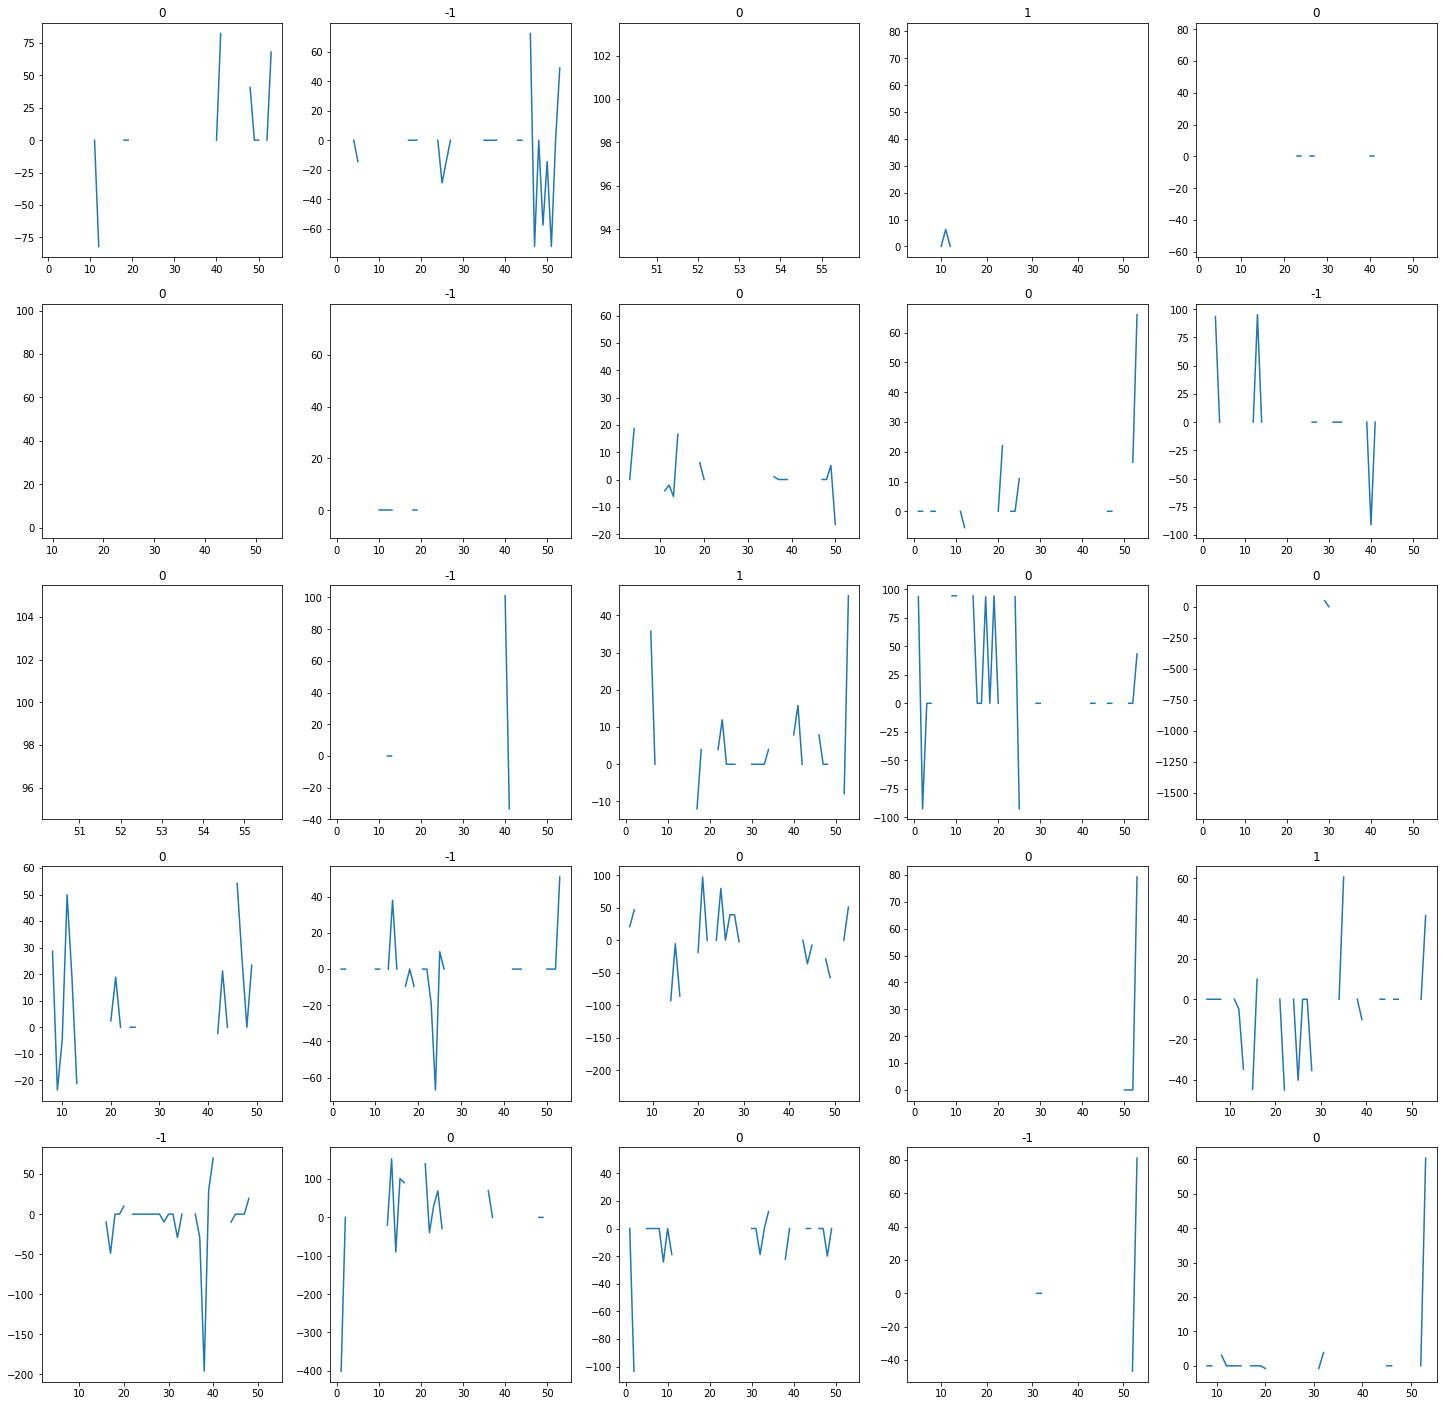

In [167]:
threshold = 40
row_remov = full_data.loc[full_data['pctmissing'] > threshold].index

fd_m = full_data.loc[row_remov]

tp1 = fd_m.sample(25)
y_tp1 = tp1['reod']
tp1.drop('reod',axis=1,inplace=True)

plt.figure(figsize=(25,25))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.plot(np.arange(1,54), tp1.iloc[i,3:])
    plt.title(y_tp1.iloc[i])
plt.show()

No obvious pattern to me at all. Even with prices sharply moving up at the very end. 

In [168]:
y_tr.loc[row_remov]['reod'].value_counts(normalize=True)

 0   0.74
-1   0.14
 1   0.13
Name: reod, dtype: float64

# Submission

## Preparing the test set

In [42]:
test = pd.read_csv('input_test.csv')
test.head()

,ID,day,equity,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,r17,r18,r19,r20,r21,r22,r23,r24,r25,r26,r27,r28,r29,r30,r31,r32,r33,r34,r35,r36,r37,r38,r39,r40,r41,r42,r43,r44,r45,r46,r47,r48,r49,r50,r51,r52
0,1000000,1000384,1000064,79.19,-26.37,-167.18,103.46,-102.27,-198.02,13.77,-59.61,-92.85,4.70,-14.08,21.16,-243.90,19.27,-180.75,-149.25,-394.54,-533.83,-242.39,-397.24,167.56,152.94,17.36,-34.66,-260.87,214.29,-46.65,64.44,192.76,11.46,216.52,212.05,164.38,-5.40,21.66,16.21,-70.12,-157.52,-237.70,-277.62,-375.98,0.00,154.76,-116.69,29.82,-29.69,77.57,23.75,82.94,-17.63,17.60,5.87,0.00
1,1000001,1000148,1000841,-321.77,-178.53,107.97,27.29,-64.54,-73.78,9.93,-26.50,89.50,9.29,-43.72,68.04,-47.95,54.78,17.42,82.55,-33.39,-39.94,-6.50,-13.01,85.66,-90.31,-62.84,38.11,100.74,110.30,32.84,76.09,1.57,11.52,38.71,12.50,99.82,59.78,-30.77,-16.46,35.04,72.90,-7.12,-2.04,29.57,-2.04,-5.09,-12.21,1.53,32.08,-33.50,-21.41,43.89,68.07,-23.20,-13.14,-82.95
2,1000002,1000441,1000380,-51.95,-19.58,-26.16,-26.28,-3.29,3.29,-46.11,16.55,-72.68,-3.33,-3.33,-19.99,-30.00,-3.34,13.40,-6.69,3.35,-6.70,38.58,-13.36,0.00,-23.41,0.00,-13.40,-13.42,0.00,0.00,-10.09,-10.11,3.37,16.87,-20.21,-3.37,-10.13,23.66,13.49,-3.36,3.37,-13.49,-3.38,-10.13,-16.90,-13.55,13.56,-10.16,-40.68,13.61,3.40,6.80,10.20,0.00,-10.19,-6.80
3,1000003,1000059,1001843,-169.49,9.57,-76.48,28.90,0.00,-19.21,105.87,-9.52,-9.54,9.55,19.08,-14.29,-23.84,9.55,9.54,42.90,9.49,-37.91,-28.54,-9.53,9.53,-4.77,33.40,0.00,-23.79,-4.77,-9.54,14.33,-9.54,0.00,-33.46,-9.60,-19.19,-96.25,0.00,38.91,0.00,-19.38,-9.72,-29.21,0.00,68.33,-29.07,-9.72,-9.72,-9.73,-9.74,29.24,-29.18,34.15,14.58,-29.13,4.87
4,1000004,1000336,1001783,-46.19,32.17,-3.08,-32.06,11.75,27.81,-13.55,-30.21,-26.60,0.00,29.76,-21.63,-0.62,17.96,-1.24,-10.50,-16.09,6.82,32.82,24.69,-3.69,-4.93,-0.62,-10.17,4.32,3.70,-24.04,0.00,20.39,1.23,-9.56,1.85,15.42,9.24,1.85,3.08,7.38,13.53,10.13,-6.44,-7.36,8.29,-2.45,-3.68,-1.84,-1.23,1.23,5.53,-7.37,1.84,1.23,0.61,-4.30


In [84]:
full_test = test.drop('ID',axis=1)
isnum = (test.dtypes == 'float64')
ret_col = isnum.loc[isnum.values == True].index.tolist()
# The columns containing the returns
test['pctmissing'] = 100*test[ret_col].isna().sum(axis=1)/test[ret_col].shape[1]
test_nm = test.loc[test['pctmissing'] <= 20]
m_rows = test.loc[test['pctmissing'] > 20].index

In [49]:
it = test_nm[ret_col].interpolate(axis=1)
test_nm[ret_col] = it
test_num=test_nm[ret_col]
test_num.loc[(test_num.isna()).sum(axis=1) != 0] = test_num.loc[(test_num.isna()).sum(axis=1) != 0].apply(lambda row: row.fillna(row.mean()), axis=1)
test_nm[ret_col] = test_num

In [50]:
test_nm.isna().sum().sum()

0

In [74]:
# Features engineering: first variance by equity.
test_nm['DbD_varn'] = test_nm.groupby('equity')['r52'].transform('std')
q1 = test_nm.groupby('equity')['r52'].std().quantile(.25)
q2 = test_nm.groupby('equity')['r52'].std().quantile(.5)
q3 = test_nm.groupby('equity')['r52'].std().quantile(.75)
test_nm['AssetVar'] = pd.cut(test_nm['DbD_varn'],[0,q1,q2,q3,np.inf],labels = ['tiny','small','medium','large'])

In [54]:
# Variance by day
test_nm["DailyVar"] = test_nm[ret_col].std(axis=1)
test_nm['day_var'] = test_nm.groupby('day')["DailyVar"].transform('mean')


test_nm['DayVariance'] = pd.qcut(test_nm['day_var'],[0,0.25,0.75,1],labels = ['small day variance','medium day variance','big day variance'])

In [55]:
# Moving average indicators, optimized in sample.
sma_long,sma_short = 19,11
test_nm["longsma"] = test_nm[ret_col].iloc[:,-sma_long:].mean(axis=1) 
test_nm["shortsma"] = test_nm[ret_col].iloc[:,-sma_short:].mean(axis=1) 
test_nm['SMAind'] = np.where(test_nm["longsma"] > test_nm["shortsma"],-1,1)
test_nm.drop(["longsma",'shortsma'],axis=1,inplace=True)

In [59]:
test_nm.columns

Index(['ID', 'day', 'equity', 'r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7',
       'r8', 'r9', 'r10', 'r11', 'r12', 'r13', 'r14', 'r15', 'r16', 'r17',
       'r18', 'r19', 'r20', 'r21', 'r22', 'r23', 'r24', 'r25', 'r26', 'r27',
       'r28', 'r29', 'r30', 'r31', 'r32', 'r33', 'r34', 'r35', 'r36', 'r37',
       'r38', 'r39', 'r40', 'r41', 'r42', 'r43', 'r44', 'r45', 'r46', 'r47',
       'r48', 'r49', 'r50', 'r51', 'r52', 'pctmissing', 'DbD_varn',
       'Asset_var', 'DailyVar', 'day_var', 'DayVariance', 'SMAind'],
      dtype='object')

In [80]:
cat_data = ['day','equity','AssetVar','DayVariance','SMAind']
X_CFM = test_nm[cat_data]
nmrows = X_CFM.index 

In [77]:
X_CFM.columns == X_train.columns

array([ True,  True,  True,  True,  True])

In [99]:
y_temp = my_pipe_rf.predict(X_CFM)

In [105]:
y_temp

array([ 1,  0, -1, ..., -1,  0,  0], dtype=int64)

In [70]:
y_CFM_R = pd.read_csv('./output_test_random.csv')

In [102]:
y_CFM = y_CFM_R.copy()


In [106]:
y_CFM.loc[nmrows,'reod'] = y_temp

In [107]:
y_CFM

,ID,reod
0,1000000,1
1,1000001,0
2,1000002,-1
3,1000003,-1
4,1000004,-1
...,...,...
885794,1885794,0
885795,1885795,-1
885796,1885796,0
885797,1885797,-1


In [110]:
sum(y_CFM_R['reod'] == y_CFM['reod'])

335249

In [111]:
nmrows

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            885786, 885787, 885788, 885789, 885792, 885793, 885794, 885795,
            885796, 885798],
           dtype='int64', length=836158)

In [114]:
# Randomly filling for the rows containing more than 20% missing values.
U = np.random.uniform(0,1,len(m_rows))
y_CFM.loc[m_rows,'reod'] = 0 

In [115]:
y_CFM

,ID,reod
0,1000000,1
1,1000001,0
2,1000002,-1
3,1000003,-1
4,1000004,-1
...,...,...
885794,1885794,0
885795,1885795,-1
885796,1885796,0
885797,1885797,0


In [113]:
len(m_rows) + len(nmrows) == len(y_CFM)

True

In [93]:
y_CFM

,ID,reod
0,1000000,1
1,1000001,0
2,1000002,-1
3,1000003,-1
4,1000004,-1
...,...,...
885794,1885794,0
885795,1885795,-1
885796,1885796,0
885797,1885797,-1


In [94]:
y_CFM.to_csv('Sub23_01.csv',index=False)

In [95]:
y_sub = pd.read_csv('Sub23_01.csv')

In [97]:
y_sub.columns
y_sub

,ID,reod
0,1000000,1
1,1000001,0
2,1000002,-1
3,1000003,-1
4,1000004,-1
...,...,...
885794,1885794,0
885795,1885795,-1
885796,1885796,0
885797,1885797,-1


In [98]:
y_CFM

,ID,reod
0,1000000,1
1,1000001,0
2,1000002,-1
3,1000003,-1
4,1000004,-1
...,...,...
885794,1885794,0
885795,1885795,-1
885796,1885796,0
885797,1885797,-1


## Preparing the data

Let us start with the simplest classification model; for now, we just keep the r_i's columns and the daily variance. Note that we only consider assets with more than 20% of the original values given. 

In [106]:
fd_red = fd_nm.drop(['day','equity','lsthstd','red_var', 'tend_1','tend_2','tend_3','tend_4','DbD_varn'],axis=1)



X = fd_red.drop(['reod'],axis=1)
y = fd_red['reod']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.8)
ohe = OneHotEncoder(handle_unknown = 'ignore')
sc = StandardScaler()
num_cols = make_column_selector(dtype_include = 'number')
cat_cols = make_column_selector(dtype_exclude = 'number')
preproc  = make_column_transformer(
     (sc,num_cols),
     (ohe,cat_cols),
    remainder = 'passthrough'
     )

## Logistic Regression

In [107]:
lr = LogisticRegression()

my_pipe = make_pipeline(preproc,lr)

In [108]:
my_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000191B2FAE400>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000191B2FBC550>)])),
                ('logisticregression', LogisticRegression())])

In [109]:
y_pred = my_pipe.predict(X_test) 

In [110]:
accuracy_score(y_pred,y_test)

0.41273382029188355

This is a start (prolly competing w the benchmark)

## RandomForestClassifier

In [152]:
fr = RandomForestClassifier()
my_pipe_tc = make_pipeline(preproc,fr)

to_t = fd_red.sample(100000)

X_t = to_t.drop(['reod'],axis=1)
y_t = to_t['reod']

X_train,X_test,y_train,y_test = train_test_split(X_t,y_t,train_size=.8)


In [153]:
my_pipe_tc.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000191B2FAE400>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000191B2FBC550>)])),
                ('randomforestclassifier', RandomForestClassifier())])

In [154]:
y_pred_fr = my_pipe_tc.predict(X_test)

In [149]:
accuracy_score(y_pred_fr,y_test)

0.4332

## Decision Tree Classifier

In [123]:
tc = DecisionTreeClassifier()
my_pipe_tc = make_pipeline(preproc,tc)

to_t = fd_red.sample(200000)

X_t = to_t.drop(['reod'],axis=1)
y_t = to_t['reod']

X_train,X_test,y_train,y_test = train_test_split(X_t,y_t,train_size=.8)


In [124]:
my_pipe_tc.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000191B2FAE400>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000191B2FBC550>)])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [125]:
y_pred_tc = my_pipe_tc.predict(X_test)

accuracy_score(y_pred_tc,y_test)

This one is quite terrible...

In [136]:
tc.tree_

In [140]:
tree.plot_tree(tc)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000191DA724160> (for post_execute):



KeyboardInterrupt



## Support Vector Machines

Making some random attempts

In [ ]:
X_ti = fd_red.sample(10000)
X_red = X_ti.drop(['reod'],axis=1)
y_red = X_ti['reod']
A = preproc.fit_transform(X_red)
A.shape

In [ ]:
sv = SVC(gamma = 'auto')
sv.fit(A,y_red)

In [ ]:
results = []
for j in range(100):
    X_t = fd_red.sample(20000)
    X_top = X_t.drop(['reod'],axis=1)
    y_red = X_t['reod']
    y_pred = sv.predict(preproc.transform(X_top))
    results.append(accuracy_score(y_red,y_pred))
plt.figure(figsize=(20,10))
sns.histplot(results,bins = 30)

In [ ]:
X_t = fd_red.sample(5000)
X_top = X_t.drop(['reod'],axis=1)
y_red = X_t['reod']
y_pred = sv.predict(preproc.transform(X_top))

In [ ]:
y_pred

In [ ]:
accuracy_score(y_pred,y_red)

## KNeighbors classifier

In [188]:
neigh = KNeighborsClassifier()

In [201]:
my_pipe_kn = make_pipeline(preproc,neigh)

to_t = fd_red.sample(50000)

X_t = to_t.drop(['reod'],axis=1)
y_t = to_t['reod']

X_train,X_test,y_train,y_test = train_test_split(X_t,y_t,train_size=.8)

In [184]:
my_pipe_kn.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000191B2FAE400>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000191B2FBC550>)])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [185]:
y_pred_kn = my_pipe_kn.predict(X_test)

accuracy_score(y_pred_kn,y_test)

0.41

In [186]:
cross_val_score(my_pipe_kn,X_train,y_train,cv=5,scoring = 'accuracy')

array([0.4084375, 0.4178125, 0.405    , 0.4090625, 0.4196875])

In [198]:
params = {"n_neighbors" : [1,2,3,4,5]}

In [202]:
gr = GridSearchCV(neigh,param_grid = params,scoring = 'accuracy')

In [203]:
gr.fit(X_train,y_train)

ValueError: 
All the 25 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py", line 207, in fit
    return self._fit(X, y)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_base.py", line 407, in _fit
    X, y = self._validate_data(
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py", line 1074, in check_X_y
    X = check_array(
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py", line 899, in check_array
    _assert_all_finite(
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py", line 151, in _assert_all_finite
    raise ValueError("Input contains NaN")
ValueError: Input contains NaN


In [196]:
gr.best_params_

{'n_neighbors': 2}

In [206]:
X_t

,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,r17,r18,r19,r20,r21,r22,r23,r24,r25,r26,r27,r28,r29,r30,r31,r32,r33,r34,r35,r36,r37,r38,r39,r40,r41,r42,r43,r44,r45,r46,r47,r48,r49,r50,r51,r52,DbD_var,intraDayvol,Shortterm_tendency_by_Asset
279344,12.41,81.46,-105.29,19.80,24.69,-17.25,-2.47,-39.48,-7.43,-12.38,7.44,-14.88,14.91,-22.31,-19.87,-42.28,21.22,32.39,-3.72,22.35,2.48,-24.75,0.00,12.40,-2.48,-4.96,4.96,9.92,-2.48,14.86,-22.24,-2.48,12.38,4.94,4.94,2.47,-2.47,4.94,-7.41,-9.88,-24.73,-7.44,-22.33,0.00,-6.22,9.95,-7.46,6.22,0.00,-2.49,-7.46,-9.96,-9.97,small,medium_Intra,4thqt
186993,45.52,120.66,29.81,-14.86,-59.44,-14.95,-29.94,0.00,90.09,14.88,-29.76,14.90,14.88,29.67,14.79,-29.59,-14.81,-44.51,-104.32,-30.17,-15.13,30.26,15.06,15.06,45.11,44.98,-14.93,-29.90,29.94,-14.93,44.84,-14.86,0.00,14.90,0.00,14.88,0.00,14.81,-29.54,0.00,0.00,14.79,-29.54,0.00,14.79,-29.54,0.00,14.81,-14.81,-14.84,0.00,-29.63,-29.72,medium,medium_Intra,4thqt
332852,-11.36,15.50,5.16,-15.05,11.76,1.44,-3.92,-0.41,27.62,2.88,6.98,-11.49,-19.30,-14.81,17.10,-4.32,4.53,-7.81,4.53,0.00,-1.65,1.65,1.23,10.70,3.29,10.88,-1.03,-19.07,17.05,-6.35,-3.28,-6.36,5.54,1.44,-1.03,8.62,1.85,-4.10,-4.92,-4.92,-3.69,10.27,-4.72,0.41,-0.82,1.23,-0.82,-2.87,4.51,5.54,1.23,1.43,-2.05,tiny,small_Intra,4thqt
675450,11.17,-8.37,0.00,0.00,-2.79,8.37,2.79,-5.58,-2.79,-8.37,0.00,-2.79,1.40,-6.98,-2.79,2.80,-5.59,-11.19,-2.80,-14.01,-8.42,8.43,8.42,-14.02,-30.88,-2.81,5.63,-2.81,11.26,-2.81,-2.81,5.63,4.22,-7.03,-5.62,-5.63,-2.82,-22.52,5.64,-2.82,-2.82,5.64,2.82,-14.08,2.82,2.82,2.82,8.46,5.63,-2.81,5.63,2.81,4.22,tiny,tiny_Intra,4thqt
632471,-10.92,31.62,-25.79,22.41,28.66,-5.14,-14.87,-9.73,8.31,11.45,-13.16,-13.18,-19.51,-0.58,-20.42,-14.98,-6.35,0.00,-28.88,19.69,-0.58,-5.78,-18.51,12.17,11.57,7.51,-6.35,-16.75,14.18,6.35,-15.01,5.78,-15.03,-13.31,-4.64,-9.86,6.97,20.88,5.21,3.47,12.73,15.02,-15.00,-13.87,-10.43,6.38,-6.96,18.56,-16.20,-6.96,-1.74,-27.31,-22.13,tiny,tiny_Intra,4thqt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530783,13.85,25.14,-10.03,5.02,12.56,8.78,1.25,10.04,1.25,17.53,2.50,18.71,11.21,-3.73,-11.21,-6.23,14.95,-13.69,13.68,-11.17,14.90,33.48,19.77,0.00,-17.26,0.00,12.35,0.62,3.70,6.17,16.03,3.69,-2.46,-3.69,27.08,7.37,-3.68,-3.68,-9.82,-45.45,-16.04,3.71,14.82,0.00,-3.70,3.70,-11.10,0.00,-20.99,-2.47,2.47,-3.71,-6.18,small,medium_Intra,4thqt
459810,-1.22,4.89,6.10,10.98,-1.22,-7.32,-10.98,-6.11,3.67,-1.22,-1.22,17.11,7.32,-6.10,0.00,20.74,-3.65,14.61,-6.08,-2.43,-4.87,0.00,-2.44,10.96,13.38,-7.29,3.65,-4.86,-2.43,4.87,8.51,-4.86,2.43,-2.43,-2.43,0.00,2.43,-3.04,9.73,1.21,6.07,0.00,1.21,0.00,3.64,2.43,0.00,6.07,1.21,-2.42,4.24,0.00,0.00,tiny,tiny_Intra,4thqt
341407,-197.04,101.01,-151.52,102.04,25.77,-50.51,0.00,-101.01,0.00,0.00,-101.52,51.55,0.00,0.00,0.00,0.00,0.00,51.55,0.00,0.00,51.55,0.00,0.00,0.00,0.00,51.55,0.00,102.56,0.00,25.64,51.28,-51.02,0.00,0.00,0.00,0.00,0.00,102.04,51.02,0.00,0.00,0.00,0.00,0.00,-50.76,-101.52,0.00,0.00,0.00,0.00,0.00,0.00,-51.02,large,large_Intra,4thqt
661903,-18.83,-79.63,-33.80,8.47,16.93,29.56,0.00,0.00,21.04,-12.59,-14.72,12.63,4.20,-4.20,-4.20,0.00,-18.91,18.94,10.50,-6.30,-37.78,8.43,0.00,16.85,25.23,0.00,12.59,8.38,12.57,-10.46,4.19,-25.12,16.79,-12.57,4.19,-8.38,0.00,31.45,10.45,-16.69,16.72,-8.35,8.35,-8.35,-83.58,21.08,0.00,-4.21,-8.42,-10.53,-4.22,-25.30,-8.45,small,small_Intra,4thqt
